In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Загрузим обработанные данные.

In [108]:
df3 = pd.read_csv('processed_dataset.csv')
df3.head()

,post_id,date,likes,reposts,views,comments,attachments,text,movie,director,year,additional_info,oscar_winner,oscar_nominee,palme_winner,globe_winner,movie_flg
0,31701,1681698600,786,401,112018,18,9,🖤 Изабель Аджани в фильме «Смертельная поездка...,NaN,NaN,1983,🖤 Изабель Аджани в фильме «Смертельная поездка...,0.0,NaN,NaN,NaN,False
1,51009,1714739400,46,30,5841,3,9,"«Чернокнижник: Армагеддон», 1993 год. \nРежисс...",Чернокнижник: Армагеддон,Энтони Хикокс,1993,NaN,0.0,0.0,0.0,0.0,True
2,50998,1714725000,274,561,31437,3,9,"«Губная помада», 1976 год. \nРежиссер: Ламонт ...",Губная помада,Ламонт Джонсон,1976,"Марго Хемингуэй играет модель Крис, которая у...",0.0,0.0,0.0,0.0,True
3,50989,1714714200,114,51,13382,1,9,В главной роли — Роми Шнайдер 📽,NaN,NaN,0,В главной роли — Роми Шнайдер 📽,0.0,NaN,NaN,NaN,False
4,50983,1714703400,154,23,13978,1,6,🖤 Маргарет Куолли в объективе Тома Шумахера 🖤,NaN,NaN,0,🖤 Маргарет Куолли в объективе Тома Шумахера 🖤,0.0,NaN,NaN,NaN,False


Еще раз опишем данные в итоговом датасете:
* `post_id` - номер поста
* `data` - дата публикации поста (не в формате даты, поэтому этот столбец можно убрать)
* `likes` - количестов лайков
* `reposts` - количество репостов у поста
* `views` - количество просмотров
* `comments` - количество комментариев
* `attachments` - количество нетекстовых приложений к посту (фотографии)
* `text` - полный текст поста
* `movie` - название фильма, который упоминается в посте
* `director` - имя режиссера
* `year` - год публикации фильма
* `additional info` - текст в посте помимо названия фильма, режиссера и года выпуска
* `oscar_winner` - 0 или 1, где 0 - фильм не выиграл Оскар, 1 - фильм выиграл Оскар
* `oscar_nominee` - NaN, 0 или 1, где NaN - в посте нет информации о фильме, 0 - фильм не был номинирован на Оскар, 1 - был номинирвован
* `palme_winner` - 0 или 1, где 0 - фильм не выиграл Золотую пальмовую ветвь, 1 - выиграл
* `globe_winner` - Nan, 0 или 1, где NaN - в посте нет информации о фильме, 0 - фильме не выиграл Золотой глобус, 1 - выиграл 
* `movie_flg` - 0 или 1, где 0 - пост посвящен не фильму (например, в посте упоминается какой-то актер, набор фотографий или визуальное сравнение нескольких фильмов), 1 - пост посвящен фильму

Проверим данные на пропуски.

In [109]:
df3.isna().sum()

post_id              0
date                 0
likes                0
reposts              0
views                0
comments             0
attachments          0
text                 9
movie              354
director           364
year                 0
additional_info    465
oscar_winner         0
oscar_nominee      354
palme_winner       354
globe_winner       354
movie_flg            0
dtype: int64

Пустые значения в столбцах text и additional_info объясняются наличием постов только с картинками, оставим их для анализа. Пустые значения в столбцах movie, oscar_nominee, palme_winner и globe_winner объясняются наличием постов без информации о фильмах (то есть это посты с movie_flg=False). Мы выделим эти посты в отдельную группу и будем анализировать отдельно. Посмотрим на столбец director. 354 пустых значения в нем вызваны теми же причинами (отсутствие фильма в тексте поста), рассмотрим остальные 10.

In [110]:
df3[df3['movie'].notnull() & df3['director'].isnull()]

,post_id,date,likes,reposts,views,comments,attachments,text,movie,director,year,additional_info,oscar_winner,oscar_nominee,palme_winner,globe_winner,movie_flg
36,50675,1714282200,469,985,35152,20,9,«Извращенное» кино 📽,Извращенное,NaN,0,кино 📽,0.0,0.0,0.0,0.0,True
52,50486,1714059000,707,267,24697,38,1,"«X», 2022 // «Пэрл», 2022 // «Максин XXX», 2024",X,NaN,2022,"// «Пэрл», // «Максин XXX»,",0.0,0.0,0.0,0.0,True
95,50022,1713515400,185,49,11788,3,9,"«Ла-Ла Ленд», 2016 // «Джокер: Безумие на двои...",Ла-Ла Ленд,NaN,2016,"// «Джокер: Безумие на двоих»,",0.0,1.0,0.0,0.0,True
152,49413,1712763000,103,87,16511,3,4,«Вампирша-гуманистка ищет отчаянного доброволь...,Вампирша-гуманистка ищет отчаянного добровольца,NaN,0,Режиссер: Ариан Луи-СэзС 11 апреля в кино,0.0,0.0,0.0,0.0,True
174,49127,1712467800,390,563,64057,8,9,«Горько-сладкие» фильмы 📽,Горько-сладкие,NaN,0,фильмы 📽,0.0,0.0,0.0,0.0,True
270,48053,1711121400,626,512,63491,11,4,"«Бедные-несчастные», 2023 // «Франкеншл*ха», 1990",Бедные-несчастные,NaN,2023,"// «Франкеншл*ха»,",0.0,1.0,0.0,0.0,True
329,47534,1710325800,27,16,8724,0,4,«Демоны дома Гарретов»\nРежиссер: Пэрис Зарсил...,Демоны дома Гарретов,NaN,0,Режиссер: Пэрис ЗарсильяС 14 марта в кино,0.0,0.0,0.0,0.0,True
442,46242,1708752600,75,62,8742,0,9,«Церковь Сатаны» 📽,Церковь Сатаны,NaN,0,📽,0.0,0.0,0.0,0.0,True
454,46137,1708597800,37,38,9600,1,9,"«Свет», 2022\nРежиссер: Антон Коломеец\n\nВ жи...",Свет,NaN,2022,Режиссер: Антон КоломеецВ жизни каждого челове...,0.0,0.0,0.0,0.0,True
688,44369,1705487400,125,35,8563,3,9,"«Принцесса Мононоке», 1997\nРежиссер: Хаяо Мия...",Принцесса Мононоке,NaN,1997,Режиссер: Хаяо МиядзакиС 18 января в кинотеатрах,0.0,0.0,0.0,0.0,True


3 поста содержат подборки фильмов (строки 36, 174 и 442). Удалим их, так как они не подходят ни в одну категорию постов.

In [111]:
df3 = df3.drop(index = [36, 174, 442])
df3[df3['movie'].notnull() & df3['director'].isnull()]

,post_id,date,likes,reposts,views,comments,attachments,text,movie,director,year,additional_info,oscar_winner,oscar_nominee,palme_winner,globe_winner,movie_flg
52,50486,1714059000,707,267,24697,38,1,"«X», 2022 // «Пэрл», 2022 // «Максин XXX», 2024",X,NaN,2022,"// «Пэрл», // «Максин XXX»,",0.0,0.0,0.0,0.0,True
95,50022,1713515400,185,49,11788,3,9,"«Ла-Ла Ленд», 2016 // «Джокер: Безумие на двои...",Ла-Ла Ленд,NaN,2016,"// «Джокер: Безумие на двоих»,",0.0,1.0,0.0,0.0,True
152,49413,1712763000,103,87,16511,3,4,«Вампирша-гуманистка ищет отчаянного доброволь...,Вампирша-гуманистка ищет отчаянного добровольца,NaN,0,Режиссер: Ариан Луи-СэзС 11 апреля в кино,0.0,0.0,0.0,0.0,True
270,48053,1711121400,626,512,63491,11,4,"«Бедные-несчастные», 2023 // «Франкеншл*ха», 1990",Бедные-несчастные,NaN,2023,"// «Франкеншл*ха»,",0.0,1.0,0.0,0.0,True
329,47534,1710325800,27,16,8724,0,4,«Демоны дома Гарретов»\nРежиссер: Пэрис Зарсил...,Демоны дома Гарретов,NaN,0,Режиссер: Пэрис ЗарсильяС 14 марта в кино,0.0,0.0,0.0,0.0,True
454,46137,1708597800,37,38,9600,1,9,"«Свет», 2022\nРежиссер: Антон Коломеец\n\nВ жи...",Свет,NaN,2022,Режиссер: Антон КоломеецВ жизни каждого челове...,0.0,0.0,0.0,0.0,True
688,44369,1705487400,125,35,8563,3,9,"«Принцесса Мононоке», 1997\nРежиссер: Хаяо Мия...",Принцесса Мононоке,NaN,1997,Режиссер: Хаяо МиядзакиС 18 января в кинотеатрах,0.0,0.0,0.0,0.0,True


Еще 3 поста содержат информацию о нескольких фильмах сразу (строки 52, 95 и 270). Их мы отнесем в группу с постами, в которых нет упоминания фильмов, так как такие посты содержат картинки со сравнением двух фильмов.

Оставшиеся 4 поста - это посты, где авторы нарушили naming convention постов, из-за чего код не смог правильно отделить режиссера и дополнительный текст. Сделаем это вручную.

In [112]:
df3.loc[df3['movie']=='Вампирша-гуманистка ищет отчаянного добровольца', 'director'] = 'Ариан Луи-Сэз'
df3.loc[df3['movie']=='Вампирша-гуманистка ищет отчаянного добровольца', 'additional_info'] = 'С 11 апреля в кино'

df3.loc[df3['movie']=='Демоны дома Гарретов', 'director'] = 'Пэрис Зарсилья'
df3.loc[df3['movie']=='Демоны дома Гарретов', 'additional_info'] = 'С 14 марта в кино'

df3.loc[df3['movie']=='Свет', 'director'] = 'Антон Коломеец'
df3.loc[df3['movie']=='Свет', 'additional_info'] = 'В жизни каждого челове...'

df3.loc[df3['movie']=='Принцесса Мононоке', 'director'] = 'Хаяо Миядзаки'
df3.loc[df3['movie']=='Принцесса Мононоке', 'additional_info'] = 'С 18 января в кинотеатрах'

df3[df3['movie'].notnull() & df3['director'].isnull()]

,post_id,date,likes,reposts,views,comments,attachments,text,movie,director,year,additional_info,oscar_winner,oscar_nominee,palme_winner,globe_winner,movie_flg
52,50486,1714059000,707,267,24697,38,1,"«X», 2022 // «Пэрл», 2022 // «Максин XXX», 2024",X,NaN,2022,"// «Пэрл», // «Максин XXX»,",0.0,0.0,0.0,0.0,True
95,50022,1713515400,185,49,11788,3,9,"«Ла-Ла Ленд», 2016 // «Джокер: Безумие на двои...",Ла-Ла Ленд,NaN,2016,"// «Джокер: Безумие на двоих»,",0.0,1.0,0.0,0.0,True
270,48053,1711121400,626,512,63491,11,4,"«Бедные-несчастные», 2023 // «Франкеншл*ха», 1990",Бедные-несчастные,NaN,2023,"// «Франкеншл*ха»,",0.0,1.0,0.0,0.0,True


Здесь остались посты, в которых сравниваются кадры из разных фильмов, но поскольку они содержат только визуальную информацию и не рассматривают конкретный фильм, то мы будем считать это просто постами второй категории.

Мы разобрались с пропусками. Уберем также неинформативные столбцы с ID поста и датой.


In [113]:
df3 = df3.drop(['post_id', 'date'], axis = 1)
df3.head()

,likes,reposts,views,comments,attachments,text,movie,director,year,additional_info,oscar_winner,oscar_nominee,palme_winner,globe_winner,movie_flg
0,786,401,112018,18,9,🖤 Изабель Аджани в фильме «Смертельная поездка...,NaN,NaN,1983,🖤 Изабель Аджани в фильме «Смертельная поездка...,0.0,NaN,NaN,NaN,False
1,46,30,5841,3,9,"«Чернокнижник: Армагеддон», 1993 год. \nРежисс...",Чернокнижник: Армагеддон,Энтони Хикокс,1993,NaN,0.0,0.0,0.0,0.0,True
2,274,561,31437,3,9,"«Губная помада», 1976 год. \nРежиссер: Ламонт ...",Губная помада,Ламонт Джонсон,1976,"Марго Хемингуэй играет модель Крис, которая у...",0.0,0.0,0.0,0.0,True
3,114,51,13382,1,9,В главной роли — Роми Шнайдер 📽,NaN,NaN,0,В главной роли — Роми Шнайдер 📽,0.0,NaN,NaN,NaN,False
4,154,23,13978,1,6,🖤 Маргарет Куолли в объективе Тома Шумахера 🖤,NaN,NaN,0,🖤 Маргарет Куолли в объективе Тома Шумахера 🖤,0.0,NaN,NaN,NaN,False


Посмотрим, как распредлены числовые данные и есть ли в них выбросы.

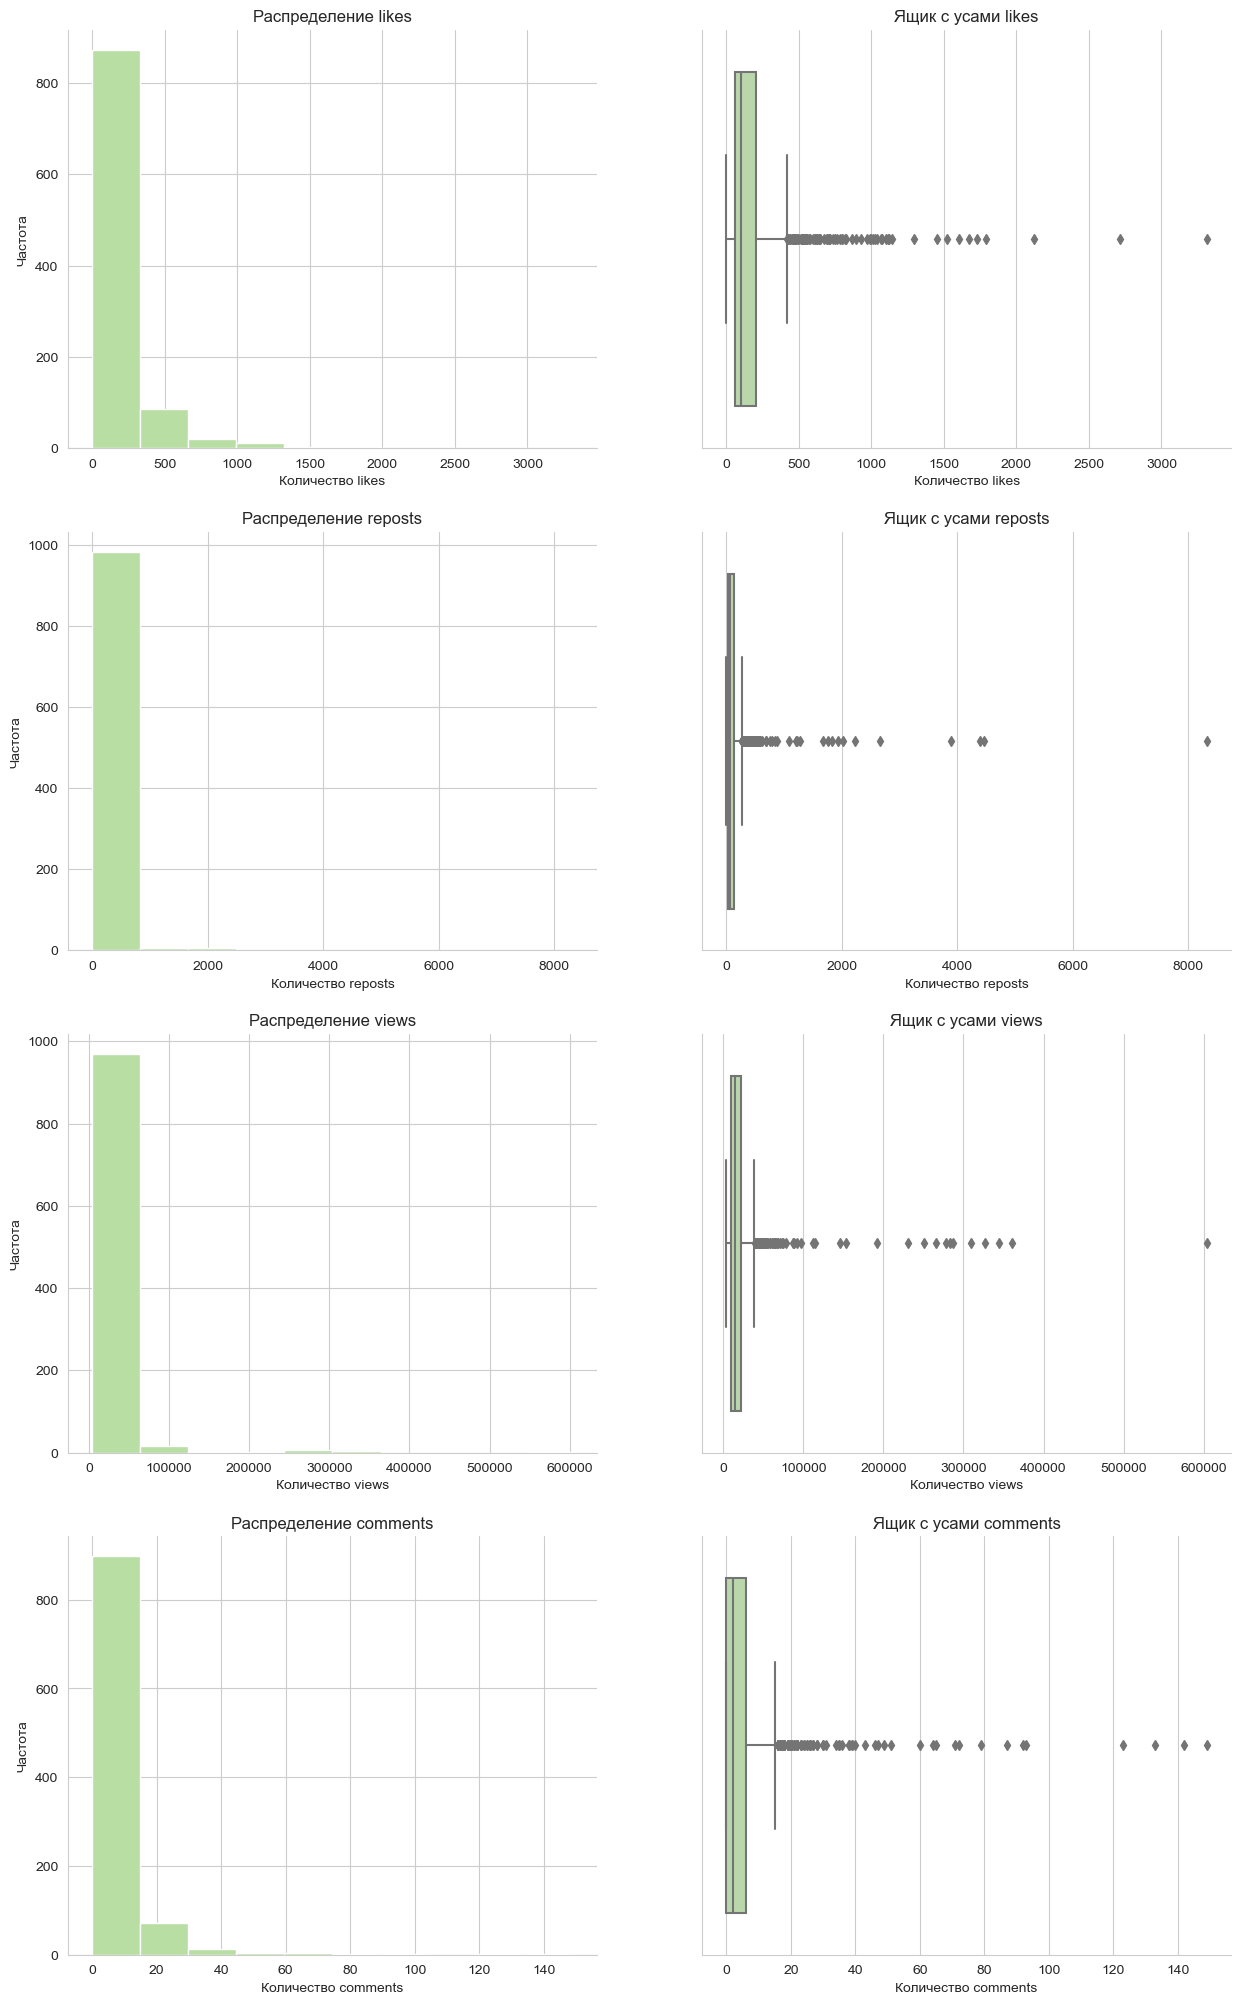

In [114]:
var_num = ['likes', 'reposts', 'views', 'comments']
sns.set_style("whitegrid")
fig, ax = plt.subplots(4, 2, figsize=(15, 25))
for i in range(len(var_num)):
    ax[i][0].set_title(f'Распределение {var_num[i]}')
    ax[i][1].set_title(f'Ящик с усами {var_num[i]}')
    ax[i][0].hist(df3[var_num[i]], color = '#b8dea4')
    ax[i][0].set_xlabel(f'Количество {var_num[i]}')
    ax[i][0].set_ylabel('Частота')
    sns.boxplot(x=df3[var_num[i]], ax=ax[i, 1], color = '#b8dea4')
    ax[i][1].set_xlabel(f'Количество {var_num[i]}')
    sns.despine(right=True, top=True);

Из графиков видно, что выбросы есть, причем достаточно много. Для сглаживания распределения сначала прологарифмируем графики.

In [115]:
for i in var_num:
  df3[f'log_{i}'] = np.log(df3[i]+1) #прибавляем 1, так как в столбцах есть нули (особенно много нулей в колонке comments)

Так выглядят распределения после логарифмирования.

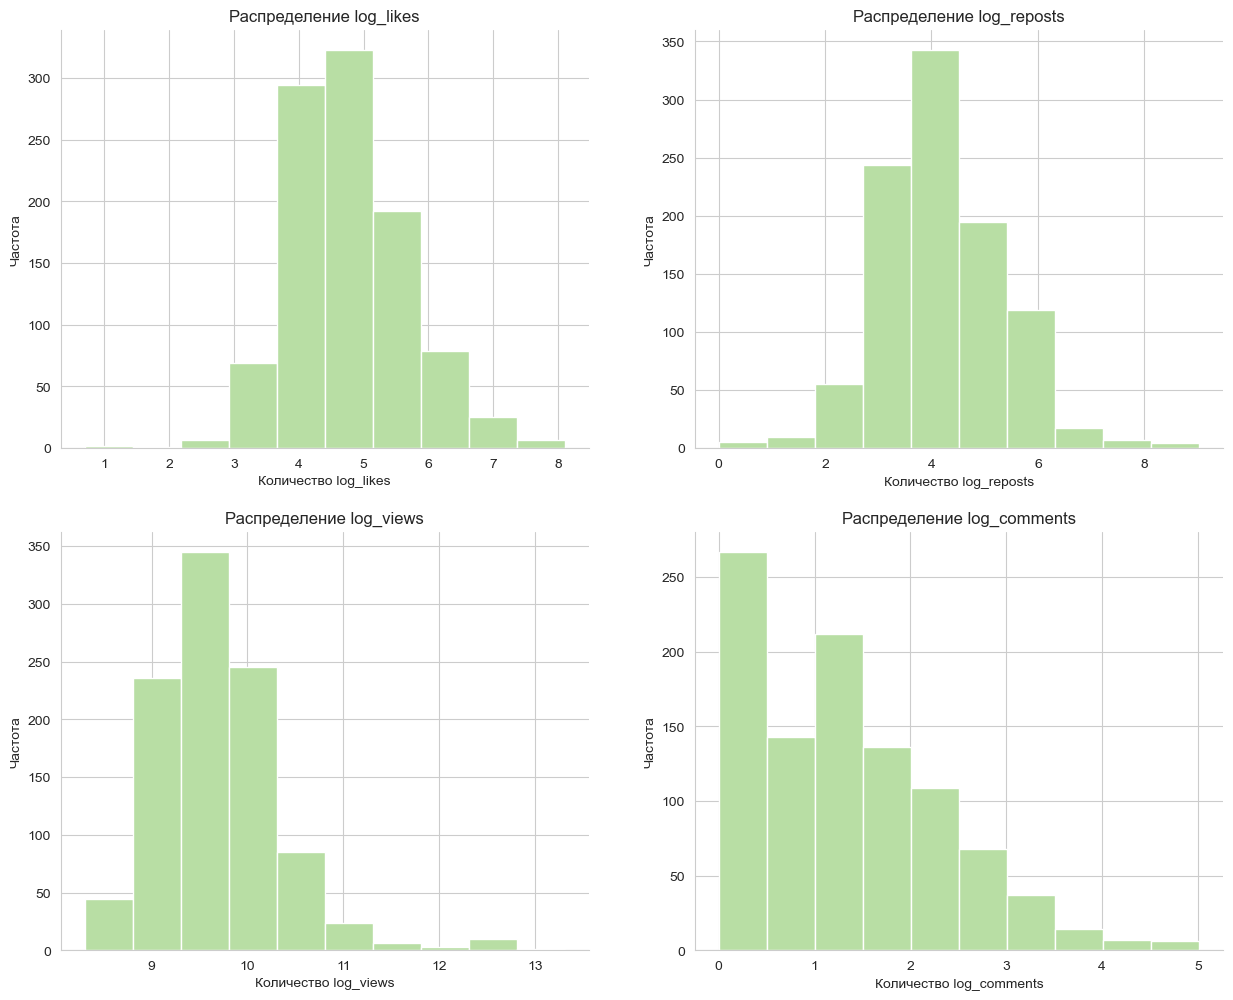

In [116]:
sns.set_style("whitegrid")
plt.subplots(figsize=(15, 25))

plt.subplot(4, 2, 1)
df3['log_likes'].hist(color = '#b8dea4')
plt.title('Распределение log_likes')
plt.xlabel('Количество log_likes')
plt.ylabel('Частота')
sns.despine(right=True, top=True)

plt.subplot(4, 2, 2)
df3['log_reposts'].hist(color = '#b8dea4')
plt.title('Распределение log_reposts')
plt.xlabel('Количество log_reposts')
plt.ylabel('Частота')
sns.despine(right=True, top=True)

plt.subplot(4, 2, 3)
df3['log_views'].hist(color = '#b8dea4')
plt.title('Распределение log_views')
plt.xlabel('Количество log_views')
plt.ylabel('Частота')
sns.despine(right=True, top=True)

plt.subplot(4, 2, 4)
df3['log_comments'].hist(color = '#b8dea4')
plt.title('Распределение log_comments')
plt.xlabel('Количество log_comments')
plt.ylabel('Частота')
sns.despine(right=True, top=True);

Теперь очистим данные от выбросов.

In [117]:
log_var_num = ['log_likes', 'log_reposts', 'log_views', 'log_comments']

def outliers(column):
    q1 = df3[column].quantile(0.25)
    q3 = df3[column].quantile(0.75)
    iqr = q3 - q1
    left = q1 - 1.5 * iqr
    right = q3 + 1.5 * iqr
    return left, right

for i in log_var_num:
    left, right = outliers(i)
    df3 = df3[(df3[i] > left) & (df3[i] < right)]

Проверим, что все данные действительно очищены от выбросов, и вновь сверим распределение признаков.

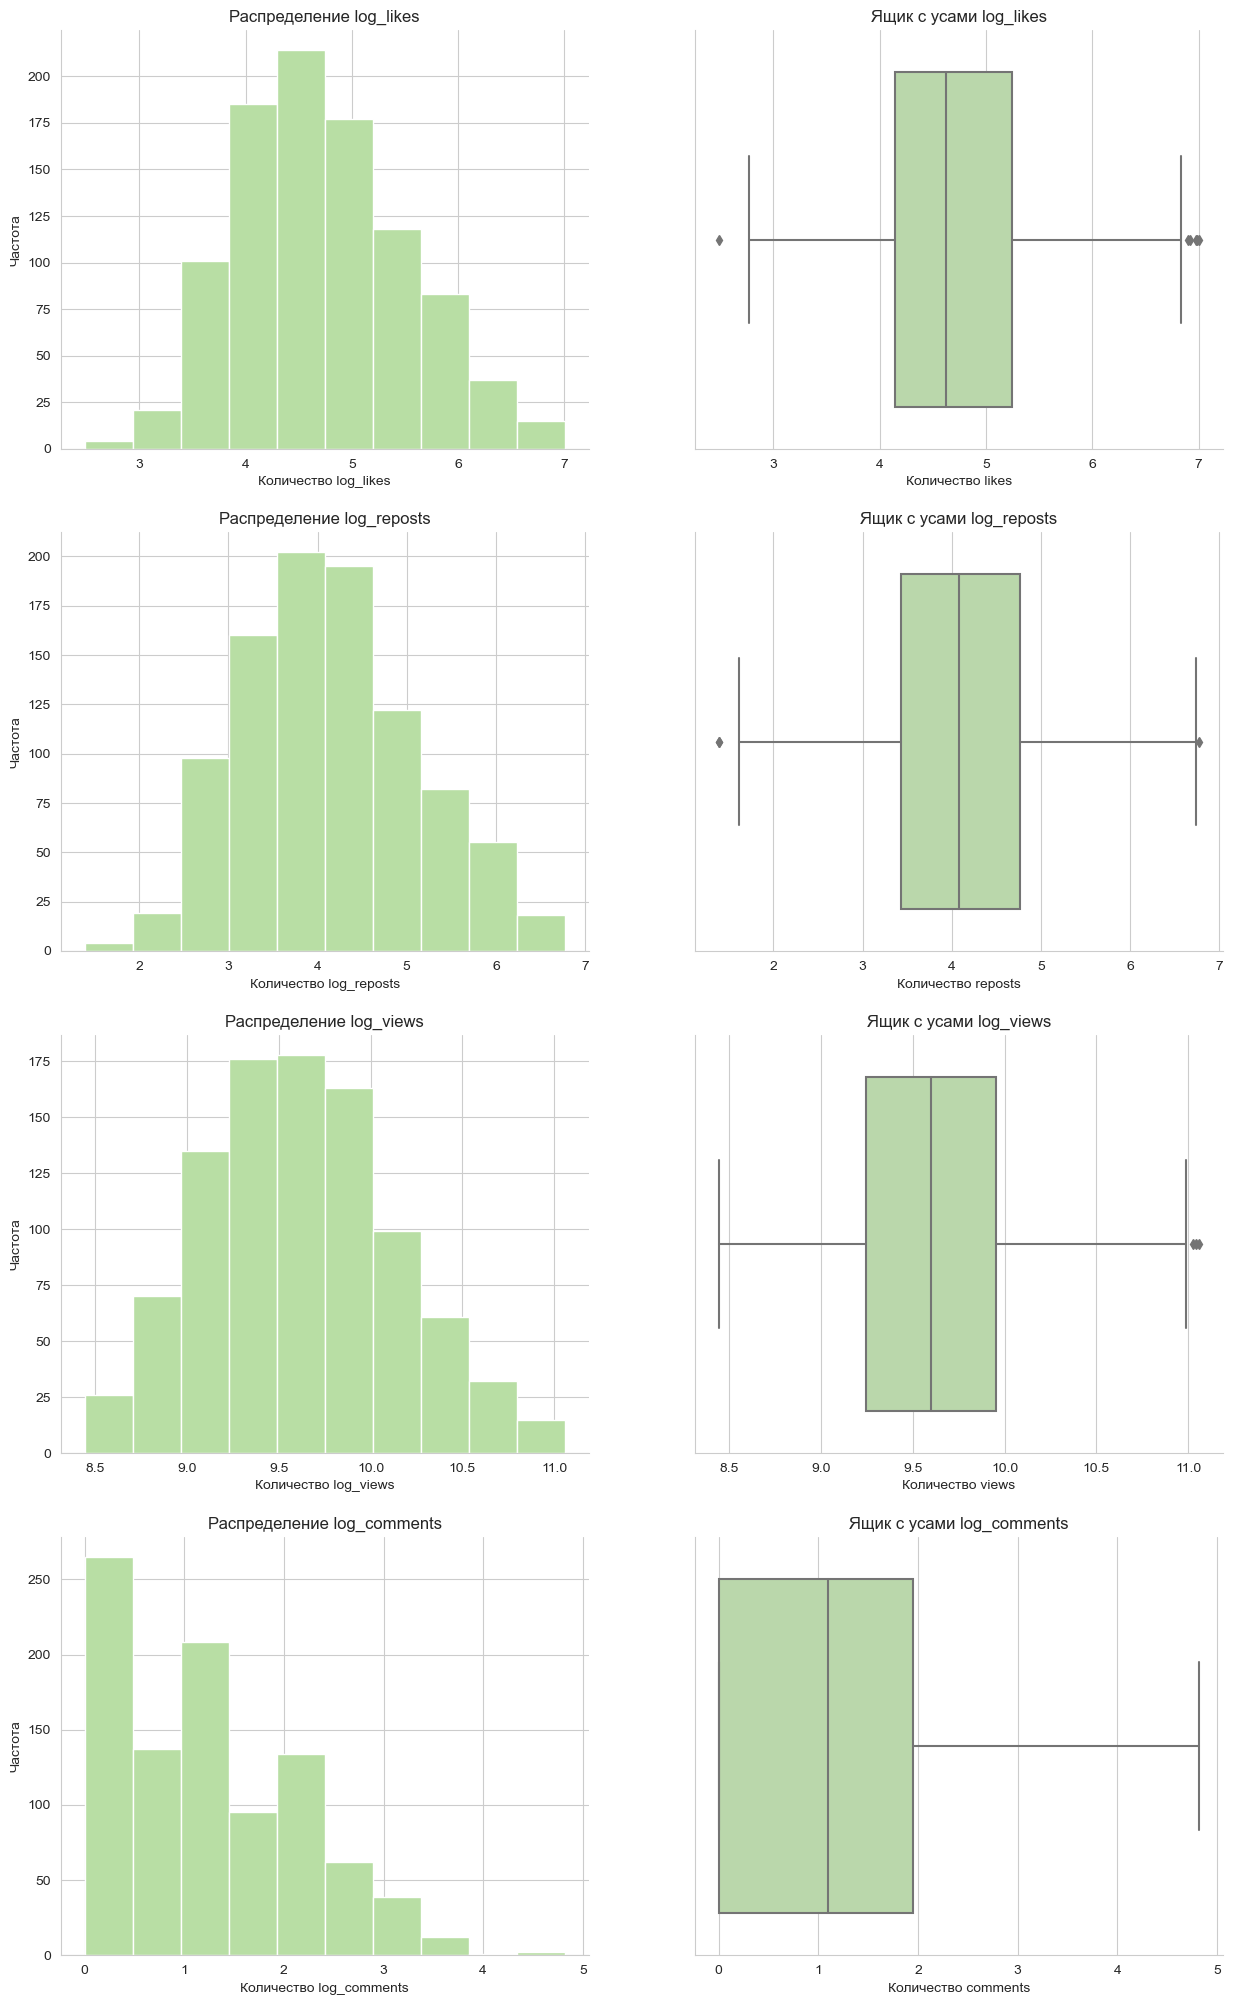

In [118]:
fig, ax = plt.subplots(4, 2, figsize=(15, 25))
sns.set_style("whitegrid")
for i in range(len(log_var_num)):
    ax[i][0].set_title(f'Распределение {log_var_num[i]}')
    ax[i][1].set_title(f'Ящик с усами {log_var_num[i]}')
    ax[i][0].hist(df3[log_var_num[i]], color = '#b8dea4')
    ax[i][0].set_xlabel(f'Количество {log_var_num[i]}')
    ax[i][0].set_ylabel('Частота')
    sns.boxplot(x=df3[log_var_num[i]], ax=ax[i, 1], color = '#b8dea4')
    ax[i][1].set_xlabel(f'Количество {var_num[i]}')
    sns.despine(right=True, top=True)

От выбросов мы не смогли избавиться до конца, поэтому повторим процедуру еще раз.

In [119]:
for i in log_var_num:
    left, right = outliers(i)
    df3 = df3[(df3[i] > left) & (df3[i] < right)]

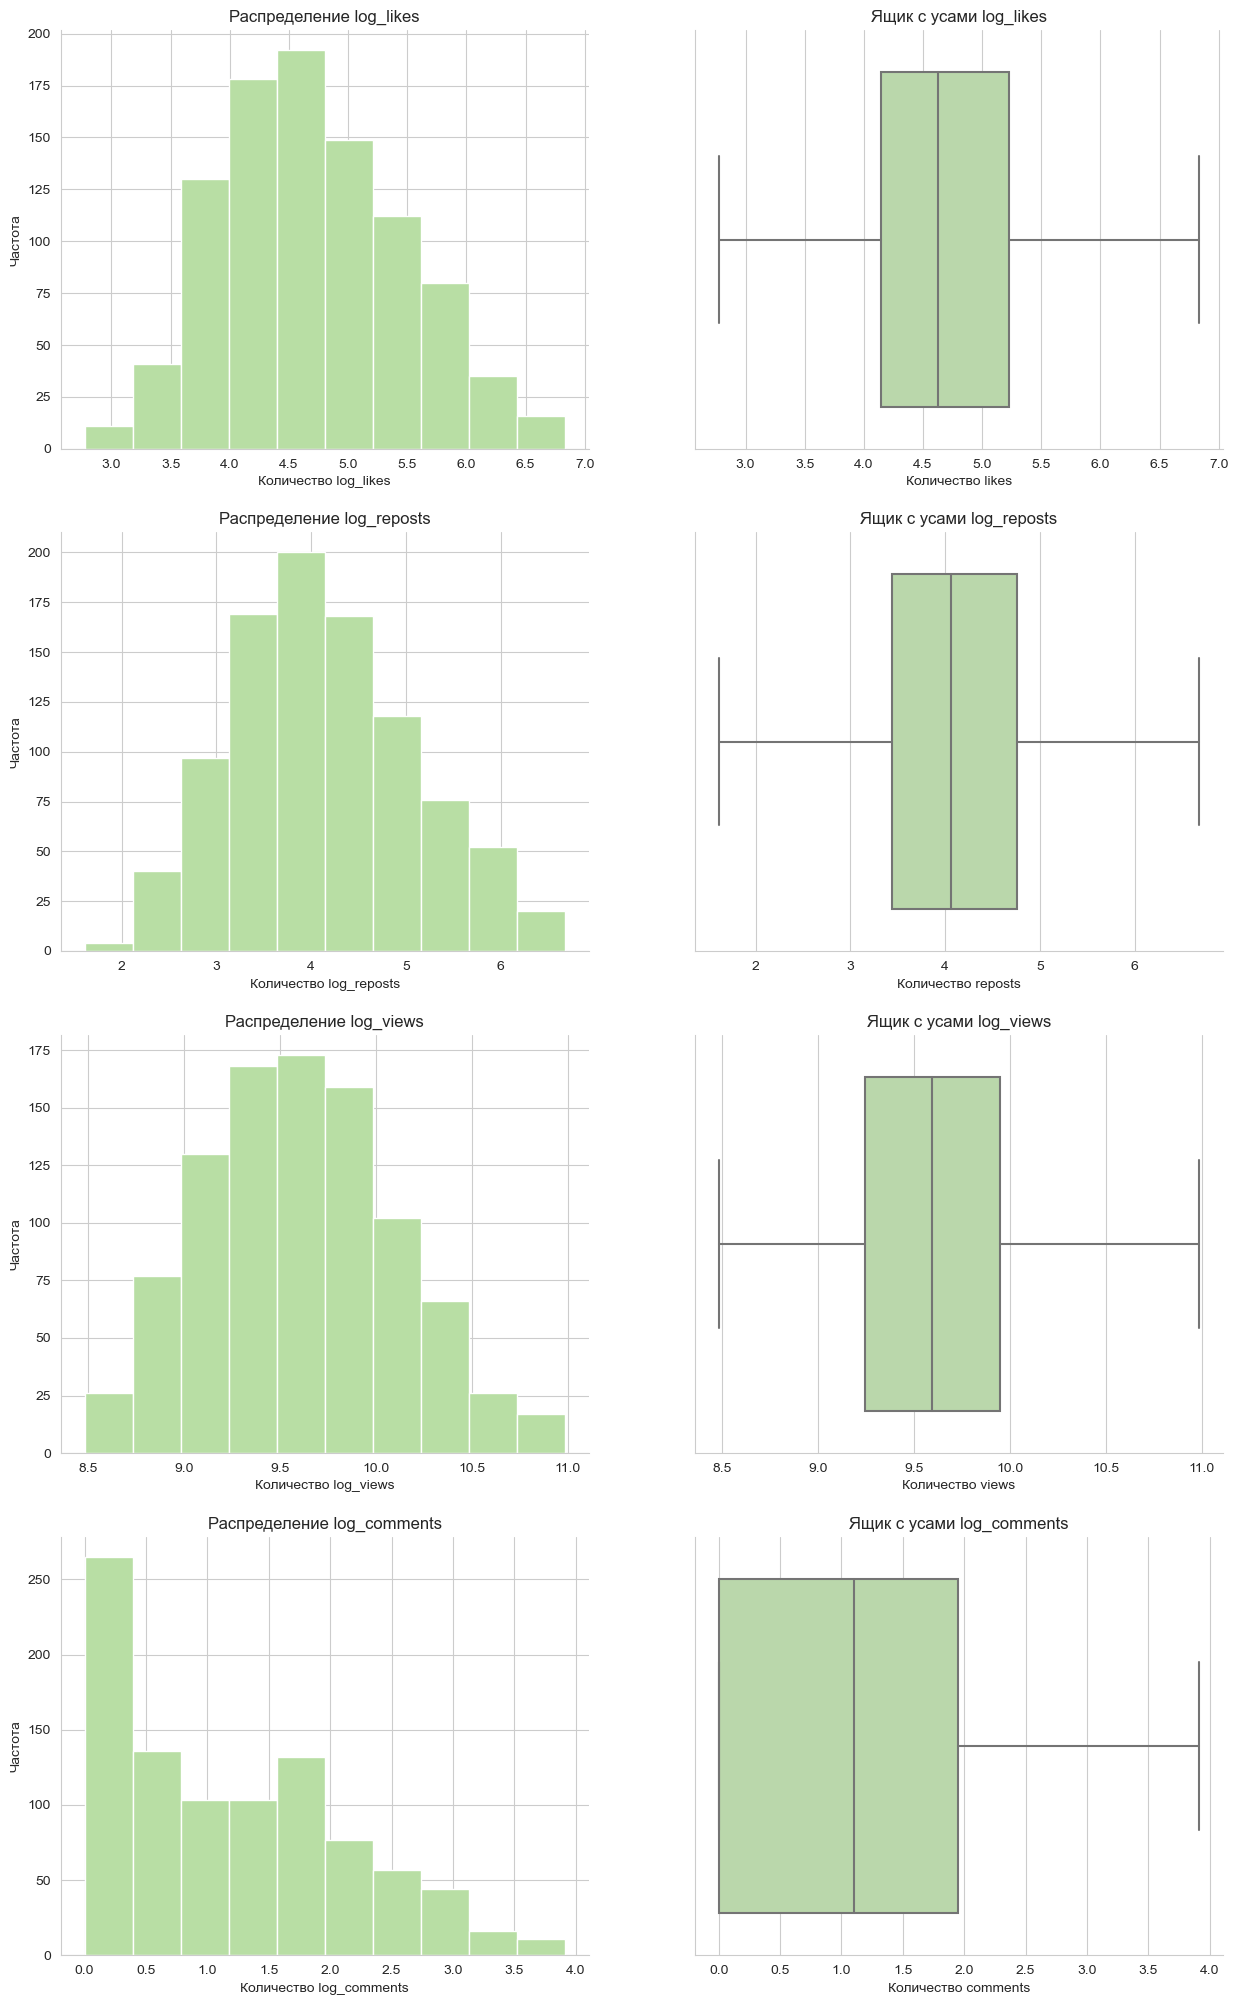

In [120]:
fig, ax = plt.subplots(4, 2, figsize=(15, 25))
sns.set_style("whitegrid")
for i in range(len(log_var_num)):
    ax[i][0].set_title(f'Распределение {log_var_num[i]}')
    ax[i][1].set_title(f'Ящик с усами {log_var_num[i]}')
    ax[i][0].hist(df3[log_var_num[i]], color = '#b8dea4')
    ax[i][0].set_xlabel(f'Количество {log_var_num[i]}')
    ax[i][0].set_ylabel('Частота')
    sns.boxplot(x=df3[log_var_num[i]], ax=ax[i, 1], color = '#b8dea4')
    ax[i][1].set_xlabel(f'Количество {var_num[i]}')
    sns.despine(right=True, top=True)

Теперь мы видим, что часть распределений похожа на нормальное, а выбросы отсутствуют. Что касается комментариев, то из-за практически полной дискретности величины добиться нормализации не удалось, но, поскольку мы в дальнейшем будем рассматривать кумулятивные признаки, включение комментариев в сумму других действий аудитории не создаст перекос из-за малых значений параметра. Поэтому столбец с комментариями мы удалять не будем из соображения ценности имеющихся данных.

In [121]:
df3.shape

(944, 19)

После очистки данных от выбросов и логарифмизации у нас осталось 944 наблюдения.

Сохраним полученные данные.

In [122]:
df3.to_csv('EDA_dataset.csv', index=False)